# Part I - (Ford Gobike Trip data)
## by (Dikshith Ravi Kumar)

## Introduction

This Project explores usage patterns from the Ford Gobike sharing system. The dataset includes over 180,000 trips taken in 2019. The goal is to perform exploratory analysis to uncover trends and then present a key insight in a polished visual.

## Preliminary Wrangling

In [60]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline


In [61]:
# Load dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [62]:
#size of data
df.shape[0]

183412

In [63]:
# dropping null values
df.dropna (inplace=True)

In [64]:
# getting the members ages
df.member_birth_year = df.member_birth_year.astype('int64')
df['member_age'] = 2019 - (pd.to_datetime(df['member_birth_year'], format = '%Y').dt.year)

In [65]:
# getting the start time in datetime data type
df.start_time = pd.to_datetime(df.start_time)

In [66]:
#create month, day of week, hour new columns
df['start_month'] = df.start_time.dt.strftime('%B')
df['start_day_of_week'] = df.start_time.dt.strftime('%A')
df['start_hour'] = df.start_time.dt.strftime('%H')


In [67]:
# check for duplicates
df.duplicated().sum()

0

In [68]:
# filter out unreasonable trip duration (>24 hrs)
df = df[df['duration_sec'] <= 86400]

In [69]:
# get all duration in min
df['duration_min']=(df['duration_sec']/60).astype('int64')

In [70]:
# change start_hour type
df['start_hour'] = df['start_hour'].astype(int)


In [71]:
#final value of all trips in feb
df.start_month.value_counts()

start_month
February    174952
Name: count, dtype: int64

In [105]:
# saving this version file for future usage
df.to_csv('new_df.csv',index=False)

### What is the structure of your dataset?

> The dataset has 174952 rows and 16 columns of data and 4 additional custom created columns after cleaning the provided file.

### What is/are the main feature(s) of interest in your dataset?

> The customers type, age, sex, start and end station, duration of trip.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> All clean data might be useful. Latitude and longitude coordinates might not be useful for my investigation.

## Univariate Exploration



Text(0.5, 1.0, 'Top end station')

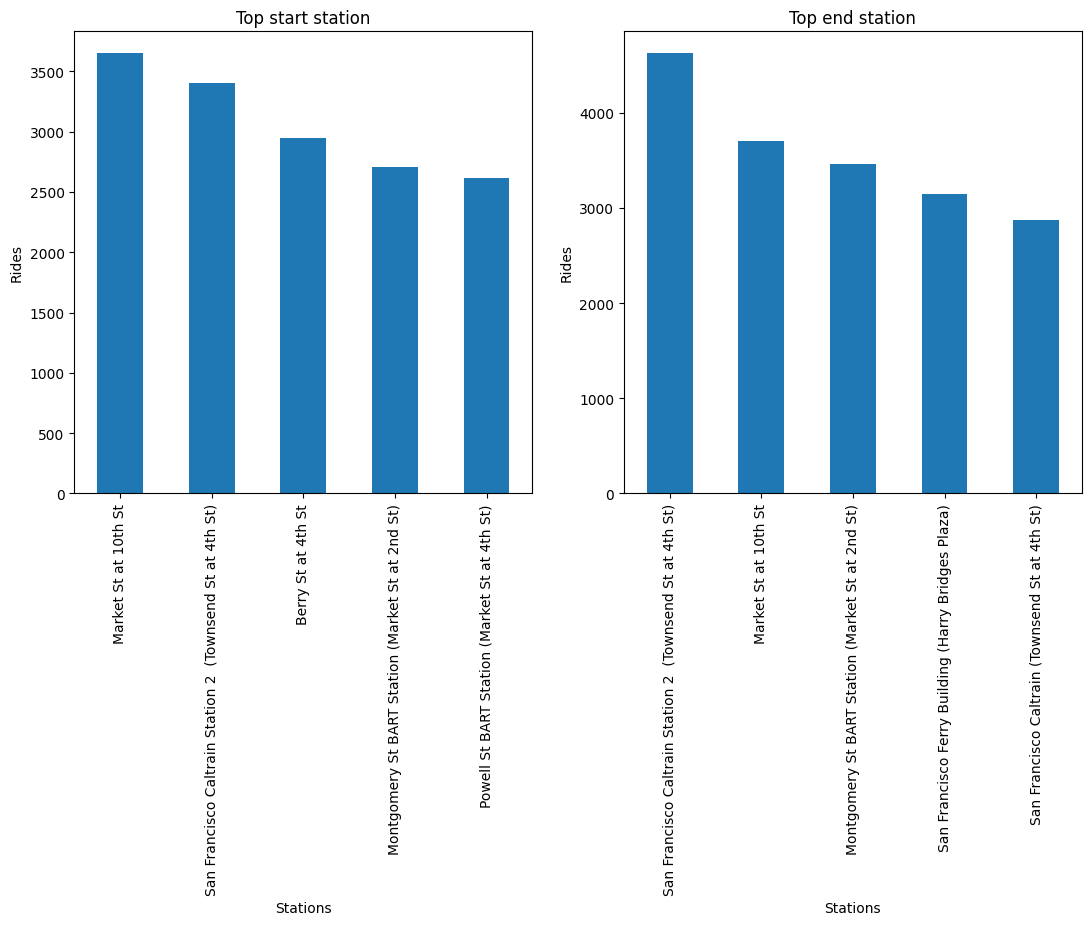

In [72]:
# Q1: Which is the top start and end station?
# getting the top start and end stations with no of rides
fig = plt.figure(figsize=[13,6])
plt.subplot(1,2,1)
tp_strt_st = df.start_station_name.value_counts()[:5]
tp_strt_st.plot(kind = 'bar')
plt.xlabel('Stations')
plt.ylabel('Rides')
plt.title('Top start station')

plt.subplot(1,2,2)
tp_end_st = df.end_station_name.value_counts()[:5]
tp_end_st.plot(kind = 'bar')
plt.xlabel('Stations')
plt.ylabel('Rides')
plt.title('Top end station')

In [73]:
#Top start station is Market St at 10th st. Top end station is San Francisco Caltrain Station 2  (Townsend St at 4th St)

(0.0, 60.0)

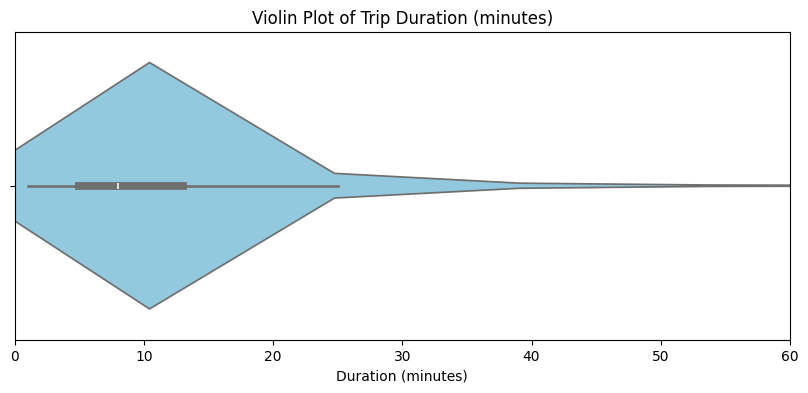

In [74]:
#Q2: Whats the common duration of trip?
plt.figure(figsize=(10, 4))
sns.violinplot(x=df['duration_min'], color='skyblue')
plt.title('Plot of Trip Duration (minutes)')
plt.xlabel('Duration (minutes)')
plt.xlim(0, 60)



In [75]:
#Trip duration is usually between 0 - 20 minutes.

Text(0.5, 1.0, 'Distribution of Member Ages')

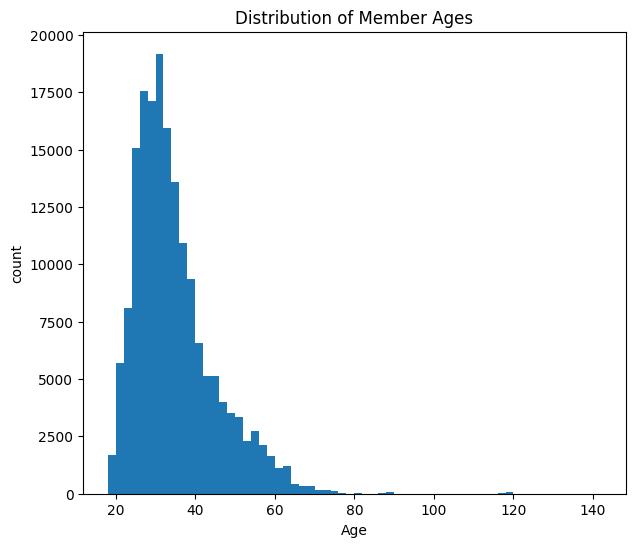

In [76]:
#Q3: What is common Age of members renting bike ?
bins = np.arange(18,df.member_age.max()+2,2)
plt.figure (figsize = [7,6])
plt.hist(df.member_age,bins=bins)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Distribution of Member Ages')


In [77]:
# Common age of people renting ike is between 20 - 40 yrs.

Text(0, 0.5, 'number of trips')

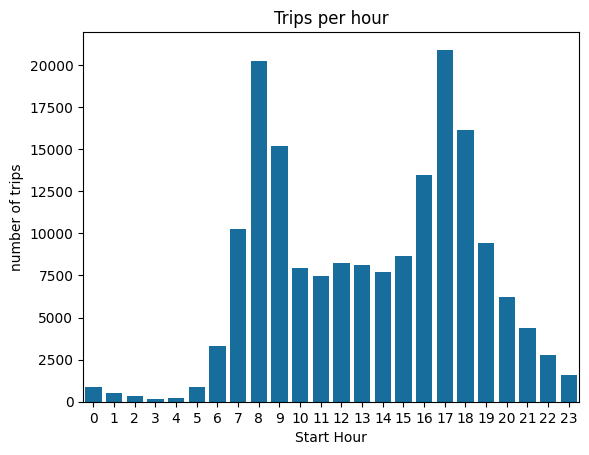

In [78]:
#Q4 : What is the most common time of bike rent?
base_color= sns.color_palette('colorblind')[0]
sns.countplot(data=df, x= 'start_hour', color=base_color)
plt.title('Trips per hour')
plt.xlabel('Start Hour')
plt.ylabel('number of trips')

In [79]:
# Around 8 am and 17 pm people rent bike the most.

Text(30.958950617283932, 0.5, 'Number of trips')

<Figure size 1000x500 with 0 Axes>

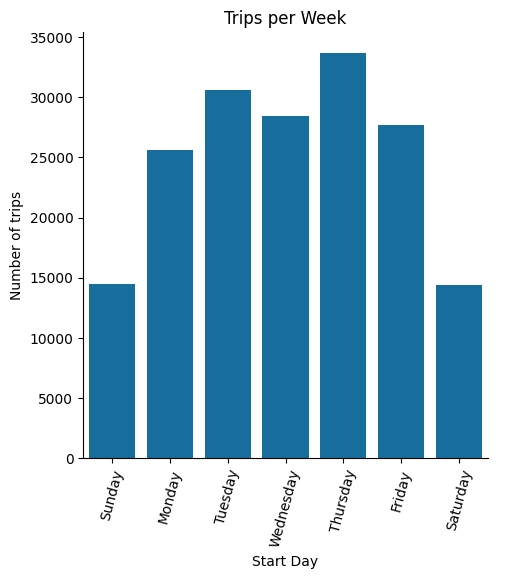

In [80]:
#Q5: Which days are bike rental the most?
week_days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.figure(figsize= [10,5])
sns.catplot(data=df, x='start_day_of_week', order=week_days, kind ='count',color = base_color)
plt.title('Trips per Week')
plt.xticks(rotation = 75)
plt.xlabel('Start Day')
plt.ylabel('Number of trips')

In [81]:
#People rent bike more on Thursday.

Text(0.5, 1.0, 'Ride count per user type')

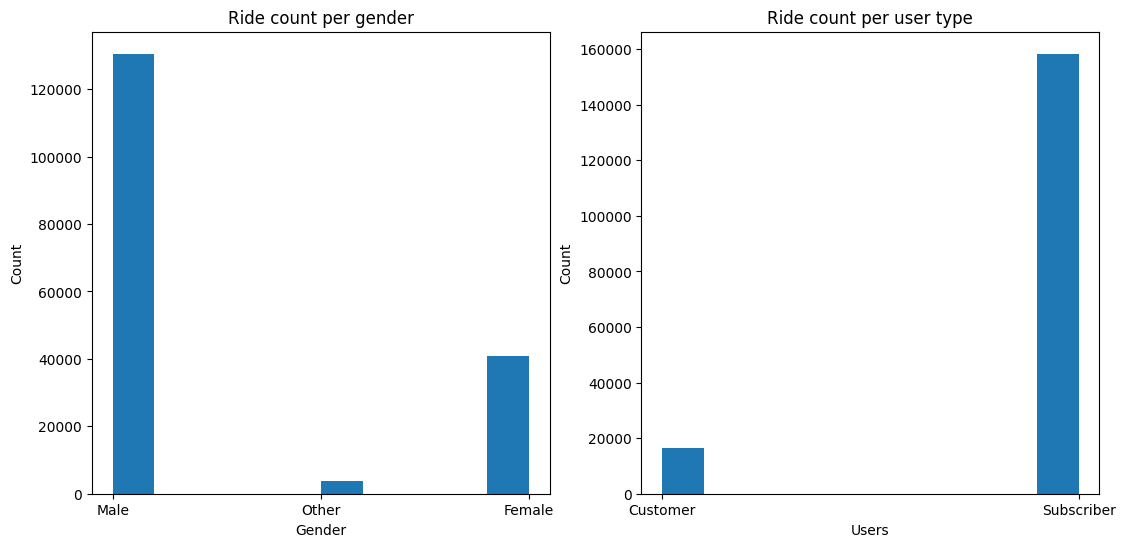

In [82]:
#Q6:Which gender and which user type rent bike most ?
fig = plt.figure(figsize = [13,6])
plt.subplot(1,2,1)
plt.hist(df.member_gender)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Ride count per gender')

plt.subplot(1,2,2)
plt.hist(df.user_type)
plt.xlabel('Users')
plt.ylabel('Count')
plt.title('Ride count per user type')


In [83]:
# Males rent most and subscribers rent most than regular customers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The top start station is Market St at 10th St and the top end station is San Francisco Caltrain Station 2  (Townsend St at  4th St).
  > Most of the trips were short like under 20 min.
  > The members age are mostly between 20-40 yrs.
  > The rush hours are 8 and 17.
  > Most trips occur on Thursday.
  > Mostly subscribers rent bike most and male rent more bikes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I created new columns such as start_month, day_of_the_week, start_hour. I also had to change the type to numbers to plot graph easily. I had to remove unwanted, duplicated and null values. I created age column for plotting age graph. 

## Bivariate Exploration



Text(0, 0.5, 'Start Hour')

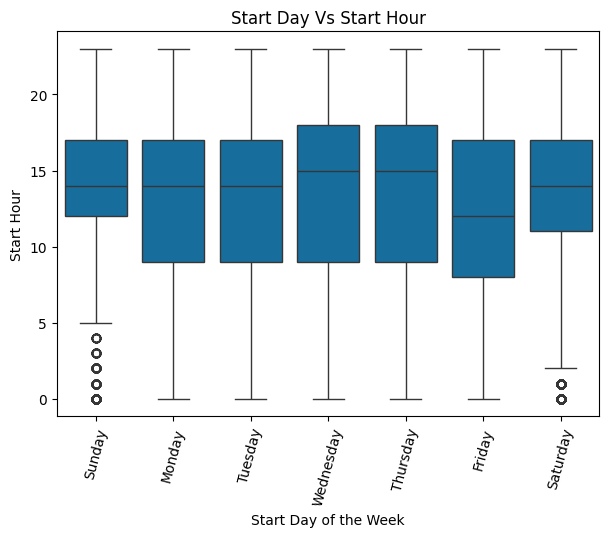

In [84]:
# Q1: What is the mean hour in week?
plt.figure(figsize=[7,5])
sns.boxplot(data=df,x='start_day_of_week',y='start_hour',color=base_color,order=week_days)
plt.xticks(rotation=75)
plt.title('Start Day Vs Start Hour')
plt.xlabel('Start Day of the Week')
plt.ylabel('Start Hour')

In [85]:
# Around 15'o clock is the mean time for bike rent

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

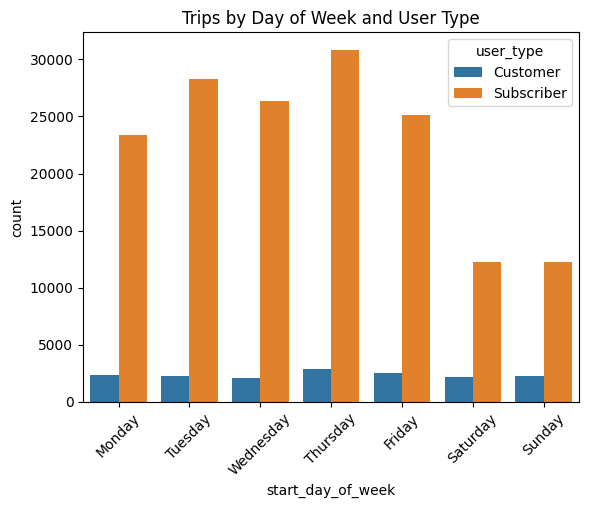

In [86]:
#Q2: On which day does subscribers rent more bike?
sns.countplot(x='start_day_of_week', hue='user_type', data=df,
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Trips by Day of Week and User Type')
plt.xticks(rotation=45)


In [87]:
#Subscribers rent bikes more on thursday.

Text(0.5, 1.0, 'Trip Duration vs. User Age')

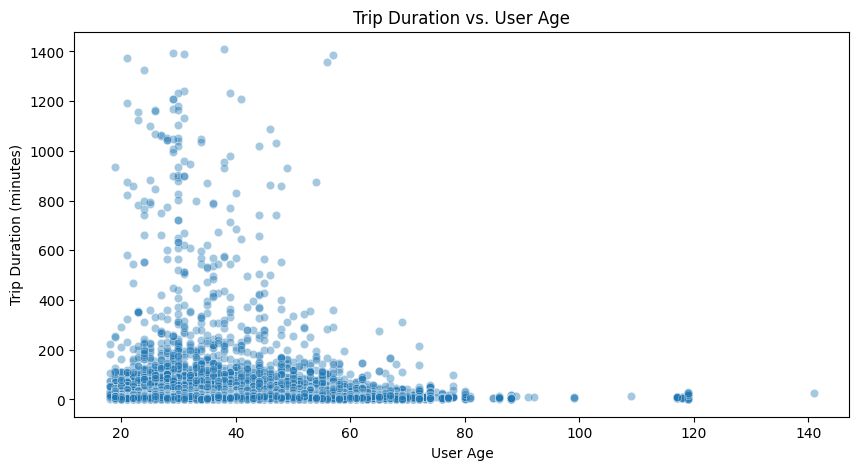

In [94]:
#Q3 : Do younger or older users tend to take longer rides?

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='member_age', y='duration_min', alpha=0.4)
plt.xlabel('User Age')
plt.ylabel('Trip Duration (minutes)')
plt.title('Trip Duration vs. User Age')



In [95]:
# Younger users between age 20 - 40 ride for more duration

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Most common peak rental time is around 15 hr everyday. We can assume it might be end of work day for employees working in that city. Subscribers rent more bikes than normal customers. It shows subscribers are loyal to the bike company.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> More bike rentals happen on Thursday. Need to find reason for this.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> **Rubric Tip**: This part (Multivariate Exploration) should include at least one Facet Plot, and one Plot Matrix or Scatterplot with multiple encodings.

>**Rubric Tip**: Think carefully about how you encode variables. Choose appropriate color schemes, markers, or even how Facets are chosen. Also, do not overplot or incorrectly plot ordinal data.

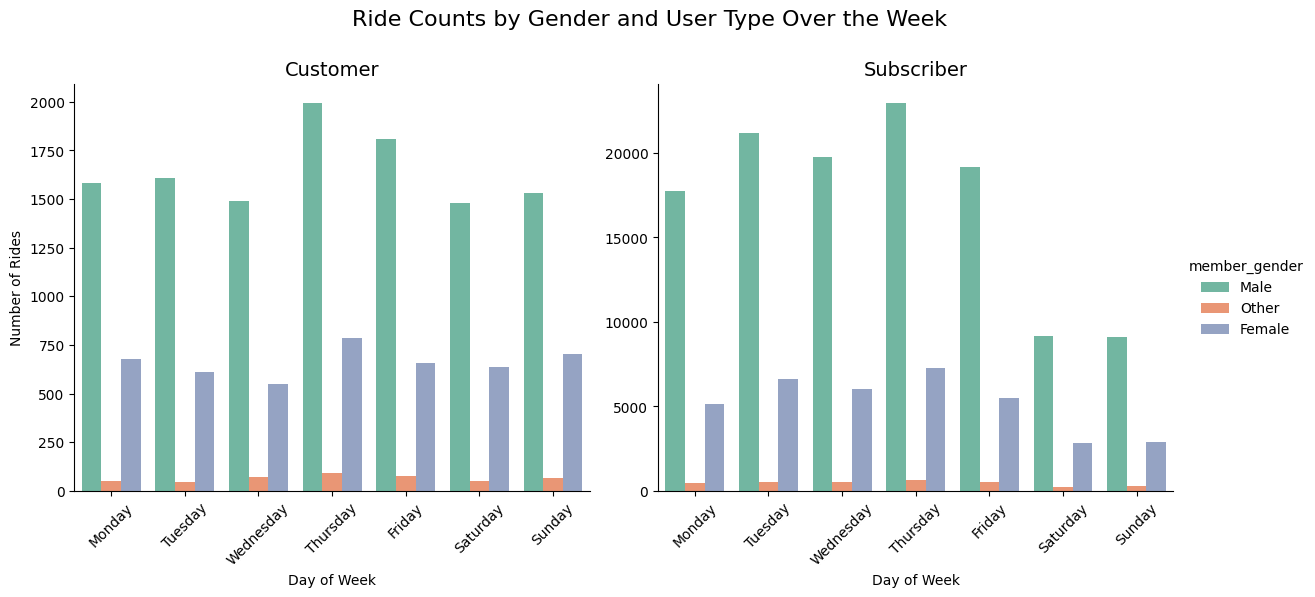

In [97]:
#Q1: Comparision between gender, user type and no of rides.
# Ensure days are ordered correctly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['start_day_of_week'] = pd.Categorical(df['start_day_of_week'], categories=days_order, ordered=True)

# Create Facet plot
g = sns.catplot(
    data=df,
    kind='count',
    x='start_day_of_week',
    hue='member_gender',
    col='user_type',
    palette='Set2',
    sharey=False,
    height=5,
    aspect=1.2
)

# Adjust titles and labels
g.set_axis_labels('Day of Week', 'Number of Rides')
g.set_titles('{col_name}', size=14)
g.fig.suptitle('Ride Counts by Gender and User Type Over the Week', y=1.08, fontsize=16)
g.set_xticklabels(rotation=45)


In [98]:
# Both subscribers and customers rode more on thursday.

Text(0.5, 1.0, 'Day vs Duration vs User Type')

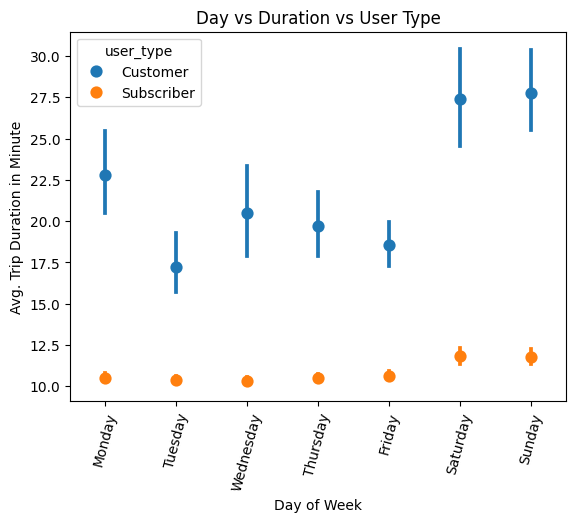

In [99]:
#Q2: Riding hours per day and user
sns.pointplot(data=df, x='start_day_of_week', y='duration_min', hue='user_type' , linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute')
plt.xticks(rotation=75)
plt.title('Day vs Duration vs User Type')


In [100]:
#More riding hours are on saturday.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Rides peaked by subscribers and preferrabely male on Thursdays.
> Males dominated the bike rentals.

### Were there any interesting or surprising interactions between features?

> The without subscription customers ride duration is higher than the normal subscriber which wasn't expected as in previous plots we saw that the subscriber have more rides than customers.
> All the observations matches with our insights form the previous visualizations.

## Conclusions
The exploratory analysis revealed strong usage patterns among different user types. 
1) Subscribers tend to use the service during weekday commute hours, while Customers have more irregular and longer-duration usage, likely for leisure or occasional travel.
2) Males used the bike rental service more than any other gender.
3) Mostly people between age of 20-40 used the bikes more.
4) People rented bikes more on Thursdays.
5) Peak time for bike rental was around 8 and 17 'o clock everyday.